In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
import keras
import tensorflow as tf
from skimage import io
import numpy as np
import os
import csv
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from keras.callbacks import LearningRateScheduler

In [3]:
folder = '/Users/hazel/Downloads/Image'#/Jake Keels - Jake_Keels
images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().endswith('.jpg')]
y_img = []
ic = []
ban = 0
ora = 0
app = 0
for img in images:
    if np.size(io.imread(img).flatten()) == 230400:
        ic.append(io.imread(img)[:,:,0].flatten())
        arr = img.split('/')
        arr = arr[np.size(arr)-1].split('\\')
        if 'ban' in arr[np.size(arr)-2].lower():
            y_img.append(0)
            ban += 1
        elif 'ora' in arr[np.size(arr)-2].lower():
            y_img.append(1)
            ora += 1
        elif 'app' in arr[np.size(arr)-2].lower():
            y_img.append(2)
            app += 1
print(np.shape(ic))
print('apples: {} bananas: {} oranges {} '.format(app,ban,ora))

(2572, 76800)
apples: 858 bananas: 859 oranges 855 


In [90]:
def testPredict(X_train, X_test, y_train, y_test,model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    plot_confusion_matrix(model, X_test, y_test, cmap='RdPu')
    print(metrics.classification_report(y_test, ypred))
    
def modelLearning(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    print('Logistic model')
    testPredict(X_train, X_test, y_train, y_test,model)
    model = DecisionTreeClassifier()
    print('Decision Tree model')
    testPredict(X_train, X_test, y_train, y_test,model)
    model = RandomForestClassifier()
    print('Random Forest model')
    testPredict(X_train, X_test, y_train, y_test,model)
    
EPOCHS = 500
def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 5 == 0) and (epoch != 0):
        lr = lr * 0.9
    return lr

def mlpModel(x_train, x_test, y_train, y_test, x_validate, y_validate):
    model = keras.models.Sequential()
    model.add(Dense(8, input_shape=np.shape(x_test[0]),activation='selu'))
    model.add(Dense(128,activation='selu'))
    #softplus ,selu, relu
    model.add(Dense(3, activation='sigmoid'))
    
    lr_scheduler = LearningRateScheduler(decay_schedule)

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=int(EPOCHS/5))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00000001),loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])#'mae',
    return model.fit(np.array(x_train),
                     np.array(y_train),
                     epochs=EPOCHS, 
                     verbose = True, 
                     batch_size = int(len(ic)*8/125),
                     callbacks=[callback], 
                     validation_data=(x_validate, y_validate)),model
    
def mlpStats(history,model):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs[1:], train_loss[1:], 'g.', label='Training loss')
    plt.plot(epochs[1:], val_loss[1:], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    y_pred = model.predict(x_test)
    y_pred_bool = np.argmax(y_pred, axis=1)
    print(metrics.classification_report(y_test, y_pred_bool))
    cm = metrics.confusion_matrix(y_test, y_pred_bool) 
    sns.heatmap(cm, annot=True,cmap='icefire')

In [82]:
x_train, x_test, y_train, y_test = train_test_split(ic, y_img,test_size=.2)
TEST_SPLIT = len(x_test) * .5
# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_test, x_validate = np.split(x_test, [int(TEST_SPLIT)])
y_test, y_validate = np.split(y_test, [int(TEST_SPLIT)])

In [ ]:
history,model= mlpModel(x_train, x_test, 
                 y_train, y_test, 
                 x_validate, y_validate)

Epoch 1/500
13/13 [==============================] - 1s 27ms/step - loss: 34.4954 - accuracy: 0.3364 - val_loss: 29.3763 - val_accuracy: 0.3682
Epoch 2/500
13/13 [==============================] - 0s 23ms/step - loss: 34.1923 - accuracy: 0.3345 - val_loss: 29.0963 - val_accuracy: 0.3682
Epoch 3/500
13/13 [==============================] - 0s 23ms/step - loss: 33.8860 - accuracy: 0.3345 - val_loss: 28.8179 - val_accuracy: 0.3682
Epoch 4/500
13/13 [==============================] - 0s 23ms/step - loss: 33.5802 - accuracy: 0.3354 - val_loss: 28.5392 - val_accuracy: 0.3682
Epoch 5/500
13/13 [==============================] - 0s 21ms/step - loss: 33.2783 - accuracy: 0.3350 - val_loss: 28.2566 - val_accuracy: 0.3682
Epoch 6/500
13/13 [==============================] - 0s 24ms/step - loss: 32.9711 - accuracy: 0.3350 - val_loss: 27.9768 - val_accuracy: 0.3721
Epoch 7/500
13/13 [==============================] - 0s 25ms/step - loss: 32.6668 - accuracy: 0.3345 - val_loss: 27.6955 - val_accuracy:

In [ ]:
mlpStats(history,model)

Logistic model


C:\Users\hazel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hazel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.43      0.42      0.43        80
           1       0.48      0.51      0.50        86
           2       0.48      0.46      0.47        91

    accuracy                           0.47       257
   macro avg       0.47      0.47      0.47       257
weighted avg       0.47      0.47      0.47       257

Decision Tree model


C:\Users\hazel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.45      0.51      0.48        80
           1       0.52      0.52      0.52        86
           2       0.45      0.38      0.41        91

    accuracy                           0.47       257
   macro avg       0.47      0.47      0.47       257
weighted avg       0.47      0.47      0.47       257

Random Forest model
              precision    recall  f1-score   support

           0       0.65      0.78      0.71        80
           1       0.60      0.64      0.62        86
           2       0.70      0.55      0.62        91

    accuracy                           0.65       257
   macro avg       0.65      0.65      0.65       257
weighted avg       0.65      0.65      0.65       257



C:\Users\hazel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


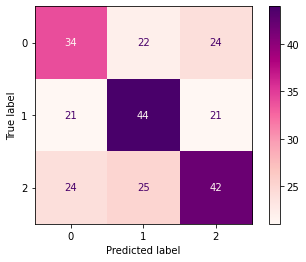

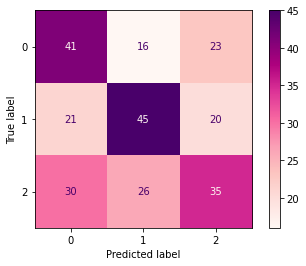

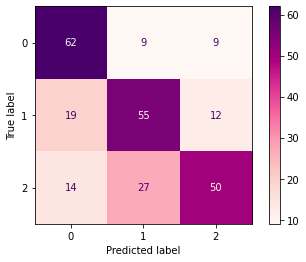

In [57]:
modelLearning(x_train, x_test, y_train, y_test)